In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline
df = pd.read_csv('voice.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2535 non-null   float64
 1   sd        2535 non-null   float64
 2   median    2535 non-null   float64
 3   Q25       2535 non-null   float64
 4   Q75       2535 non-null   float64
 5   IQR       2535 non-null   float64
 6   skew      2535 non-null   float64
 7   kurt      2535 non-null   float64
 8   sp.ent    2535 non-null   float64
 9   sfm       2535 non-null   float64
 10  mode      2535 non-null   float64
 11  centroid  2535 non-null   float64
 12  meanfun   2535 non-null   float64
 13  minfun    2535 non-null   float64
 14  maxfun    2535 non-null   float64
 15  meandom   2535 non-null   float64
 16  mindom    2535 non-null   float64
 17  maxdom    2535 non-null   float64
 18  dfrange   2535 non-null   float64
 19  modindx   2535 non-null   float64
 20  label     2535 non-null   obje

In [4]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.740862,0.924586,0.911905,0.739007,-0.631235,-0.326780,-0.320749,-0.604083,-0.785367,0.679604,1.000000,0.462932,0.385012,0.278198,0.545891,0.226595,0.527042,0.523053,-0.220620
sd,-0.740862,1.000000,-0.560907,-0.847997,-0.161680,0.875425,0.312513,0.345591,0.719952,0.839280,-0.525339,-0.740862,-0.465116,-0.347228,-0.137553,-0.486620,-0.355168,-0.487645,-0.481363,0.124858
median,0.924586,-0.560907,1.000000,0.772947,0.732444,-0.476844,-0.262364,-0.247859,-0.504098,-0.660801,0.665973,0.924586,0.421571,0.339869,0.255688,0.465587,0.187456,0.445599,0.442300,-0.217181
Q25,0.911905,-0.847997,0.772947,1.000000,0.475910,-0.875792,-0.317826,-0.349737,-0.651936,-0.767014,0.583868,0.911905,0.541910,0.318819,0.204395,0.472751,0.298141,0.465543,0.460275,-0.146938
Q75,0.739007,-0.161680,0.732444,0.475910,1.000000,0.007723,-0.217613,-0.158668,-0.172339,-0.378185,0.480454,0.739007,0.157915,0.262073,0.285877,0.370389,-0.025143,0.341331,0.341808,-0.216463
IQR,-0.631235,0.875425,-0.476844,-0.875792,0.007723,1.000000,0.241931,0.310564,0.646657,0.664525,-0.400164,-0.631235,-0.529475,-0.218660,-0.075497,-0.334231,-0.352781,-0.341984,-0.335732,0.048266
skew,-0.326780,0.312513,-0.262364,-0.317826,-0.217613,0.241931,1.000000,0.977111,-0.197473,0.080616,-0.435028,-0.326780,-0.167542,-0.218127,-0.080084,-0.334428,-0.060017,-0.302840,-0.301797,-0.165210
kurt,-0.320749,0.345591,-0.247859,-0.349737,-0.158668,0.310564,0.977111,1.000000,-0.129278,0.110918,-0.407479,-0.320749,-0.193899,-0.205262,-0.042962,-0.301858,-0.102946,-0.272653,-0.270844,-0.202704
sp.ent,-0.604083,0.719952,-0.504098,-0.651936,-0.172339,0.646657,-0.197473,-0.129278,1.000000,0.865195,-0.326759,-0.604083,-0.514488,-0.310217,-0.129183,-0.303971,-0.292655,-0.335252,-0.330070,0.198656
sfm,-0.785367,0.839280,-0.660801,-0.767014,-0.378185,0.664525,0.080616,0.110918,0.865195,1.000000,-0.482655,-0.785367,-0.420026,-0.367733,-0.201550,-0.435073,-0.287316,-0.443489,-0.438412,0.213238


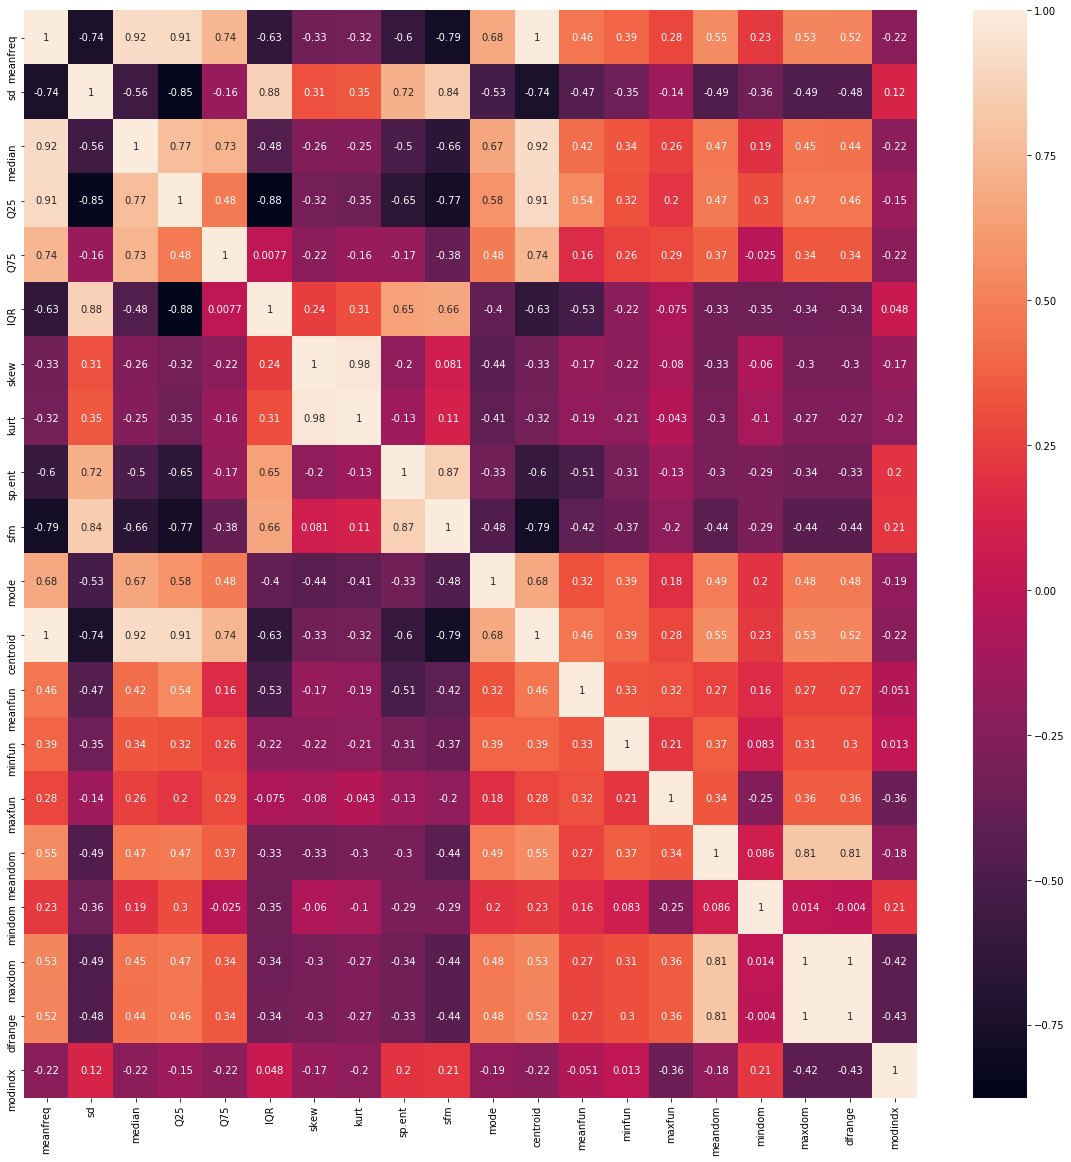

In [3]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True) 

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,0.181006,0.057098,0.185826,0.140585,0.224818,0.084232,3.142573,36.759299,0.895064,0.407639,0.165055,0.181006,0.142750,0.036869,0.258732,0.830805,0.052838,5.071040,5.018203,0.172914
std,0.029716,0.016647,0.035858,0.048571,0.023445,0.042719,4.255365,135.572688,0.044695,0.176724,0.077143,0.029716,0.032228,0.019433,0.030363,0.528979,0.063486,3.565906,3.565597,0.118765
min,0.048254,0.018363,0.015790,0.000229,0.058268,0.014922,0.141735,2.209673,0.738651,0.036876,0.000000,0.048254,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163876,0.041965,0.170057,0.111227,0.208818,0.042477,1.637159,5.607359,0.862124,0.257165,0.118012,0.163876,0.117158,0.018254,0.253968,0.419355,0.007812,2.007812,1.937500,0.099552
50%,0.185009,0.059079,0.190067,0.140479,0.225677,0.093976,2.183320,8.266441,0.901608,0.395328,0.185960,0.185009,0.140785,0.046921,0.271186,0.768466,0.023438,5.000000,4.968750,0.138806
75%,0.199061,0.066672,0.210306,0.175944,0.243632,0.114153,2.945197,13.708829,0.927736,0.533736,0.220729,0.199061,0.169408,0.047904,0.277457,1.177312,0.070312,7.007812,6.992188,0.209216
max,0.249637,0.114508,0.260541,0.242124,0.268937,0.248770,34.725453,1309.612887,0.981997,0.842936,0.280000,0.249637,0.237636,0.204082,0.279114,2.957682,0.458984,21.843750,21.820312,0.932374


In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='label')

In [4]:
X = df.drop('label', axis=1)
y = df.label
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

'X' shape: (2535, 20)
'y' shape: (2535,)


In [5]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.33, 0.3, 0.25, 0.2, 0.1, 0.01], 
              'kernel': ['rbf', 'poly', 'linear']
             } 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print(grid.best_params_)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:   32.3s


Accuracy Score: 0.9822485207100592
{'C': 10, 'gamma': 0.33, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   34.4s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [7]:
grid = grid.fit(X,y)
df_test = pd.read_csv('test.csv')
scaler = StandardScaler()
scaler.fit(df_test)
df_test = scaler.transform(df_test)
y_pred = grid.predict(df_test)
df_test = pd.read_csv('test.csv')
df_test['label'] = pd.DataFrame(y_pred)
df_test.to_csv('result.csv')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1495 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   42.4s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [9]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf':[2,3,5,10],
    'min_impurity_decrease':[0.1,0.2,0.5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print(grid.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    3.8s


Accuracy Score: 0.9526627218934911
{'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2}


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    6.6s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [12]:
from sklearn.linear_model.logistic import LogisticRegression
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty':['l1','l2','elasticnet']
}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
print(grid.best_params_)

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s


Accuracy Score: 0.9664694280078896
{'C': 0.5, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    5.1s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [21]:
with open('result','w') as f:
    f.write('label')
    for i in range(len(y_pred)):
        f.write('\n'+y_pred[i])

In [15]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.33, 0.3, 0.25, 0.2, 0.1, 0.01], 
              'kernel': ['rbf', 'poly', 'linear']
             } 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
svc_y_pred=grid.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf':[2,3,5,10],
    'min_impurity_decrease':[0.1,0.2,0.5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
tree_y_pred=grid.predict(X_test)

from sklearn.linear_model.logistic import LogisticRegression
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'penalty':['l1','l2','elasticnet']
}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=1, cv=10, iid=True, n_jobs = -1)
grid.fit(X_train,y_train)
Logic_y_pred=grid.predict(X_test)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   27.4s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:    3.6s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Done 187 out of 210 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.3s finished
D:\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [14]:
print('Svc_Accuracy Score:',metrics.accuracy_score(y_test,svc_y_pred))
print('Tree_Accuracy Score:',metrics.accuracy_score(y_test,tree_y_pred))
print('Logic_Accuracy Score:',metrics.accuracy_score(y_test,Logic_y_pred))

Svc_Accuracy Score: 0.9822485207100592
Tree_Accuracy Score: 0.9526627218934911
Logic_Accuracy Score: 0.9664694280078896
